<a href="https://colab.research.google.com/github/aparajitaks/Drug_Response_ML/blob/main/05_explainability_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import joblib
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt


In [6]:
import joblib

BASE_PATH = "/content/drive/MyDrive/Drug-Response-ML/models"

logreg_model = joblib.load(f"{BASE_PATH}/logreg_model.pkl")
X_test = joblib.load(f"{BASE_PATH}/X_test.pkl")
y_test = joblib.load(f"{BASE_PATH}/y_test.pkl")

print("Model and test data loaded")


Model and test data loaded


In [7]:
preprocess = logreg_model.named_steps["preprocess"]
classifier = logreg_model.named_steps["model"]

print("Preprocess & classifier extracted")


Preprocess & classifier extracted


In [8]:
X_test_transformed = preprocess.transform(X_test)

print("X_test transformed")
print("Shape:", X_test_transformed.shape)


X_test transformed
Shape: (43013, 4380)


In [9]:
import numpy as np

cat_features = preprocess.named_transformers_["cat"].get_feature_names_out()
num_features = ["usefulCount"]

feature_names = np.concatenate([cat_features, num_features])

print("Total features:", len(feature_names))


Total features: 4380


In [10]:
import numpy as np

SAMPLE_SIZE = 1000

if X_test_transformed.shape[0] > SAMPLE_SIZE:
    idx = np.random.choice(X_test_transformed.shape[0], SAMPLE_SIZE, replace=False)
    X_shap = X_test_transformed[idx]
else:
    X_shap = X_test_transformed

print("SHAP sample shape:", X_shap.shape)


SHAP sample shape: (1000, 4380)


In [11]:
import shap

explainer = shap.LinearExplainer(
    classifier,
    X_shap,
    feature_names=feature_names
)


In [12]:
shap_values = explainer(X_shap)
print("SHAP values computed")


SHAP values computed


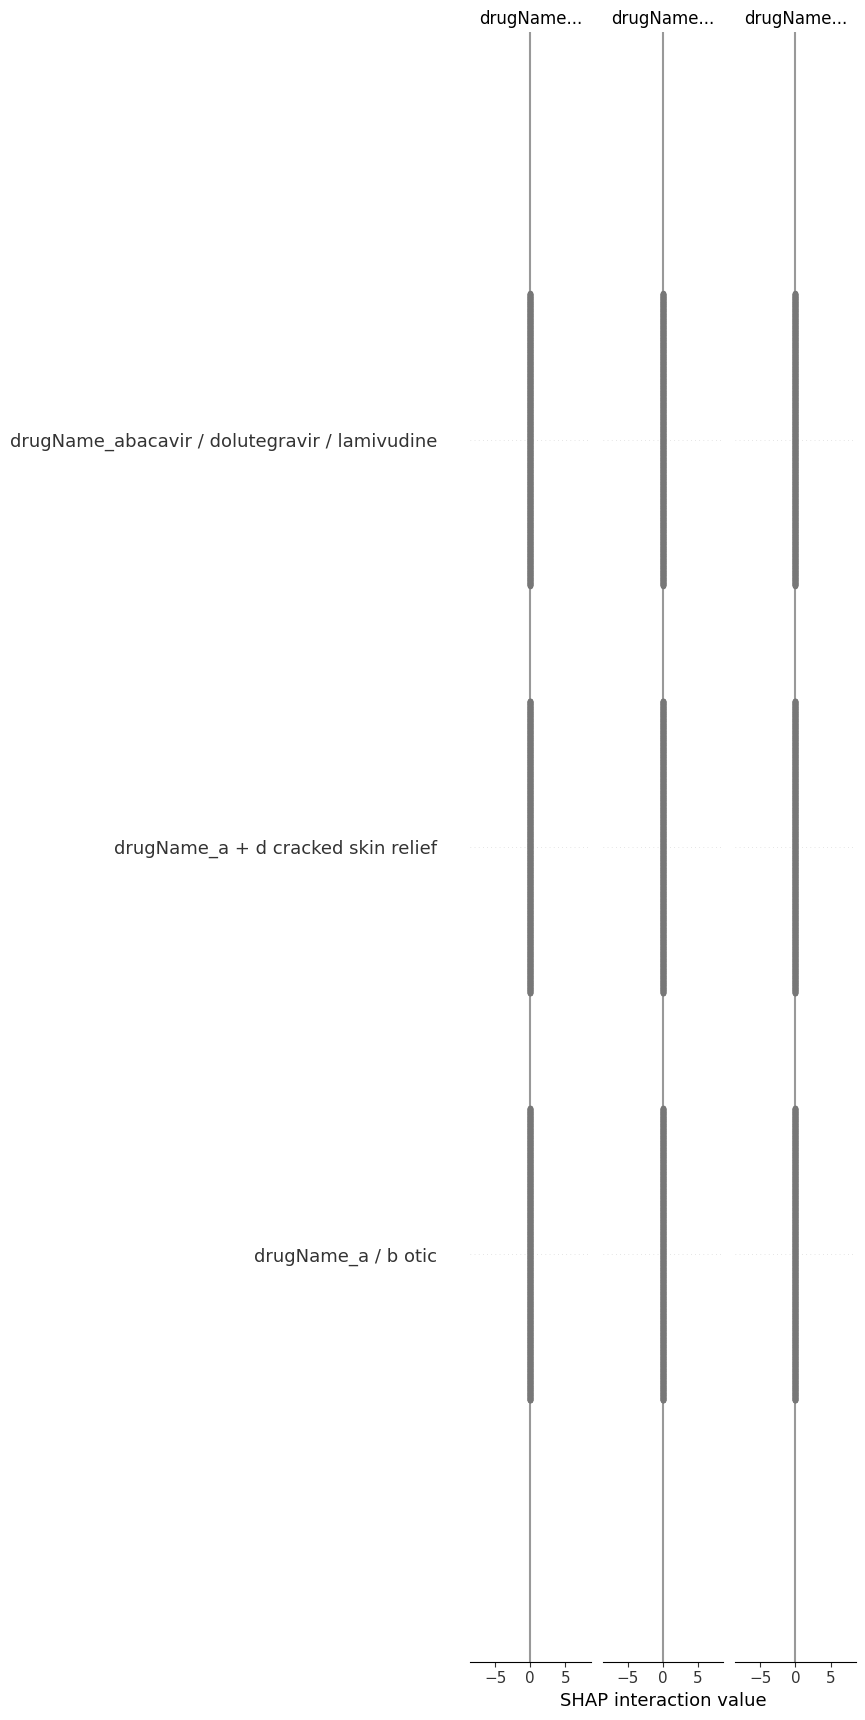

In [13]:
shap.summary_plot(
    shap_values.values,
    X_shap,
    feature_names=feature_names,
    max_display=20,
    show=True
)


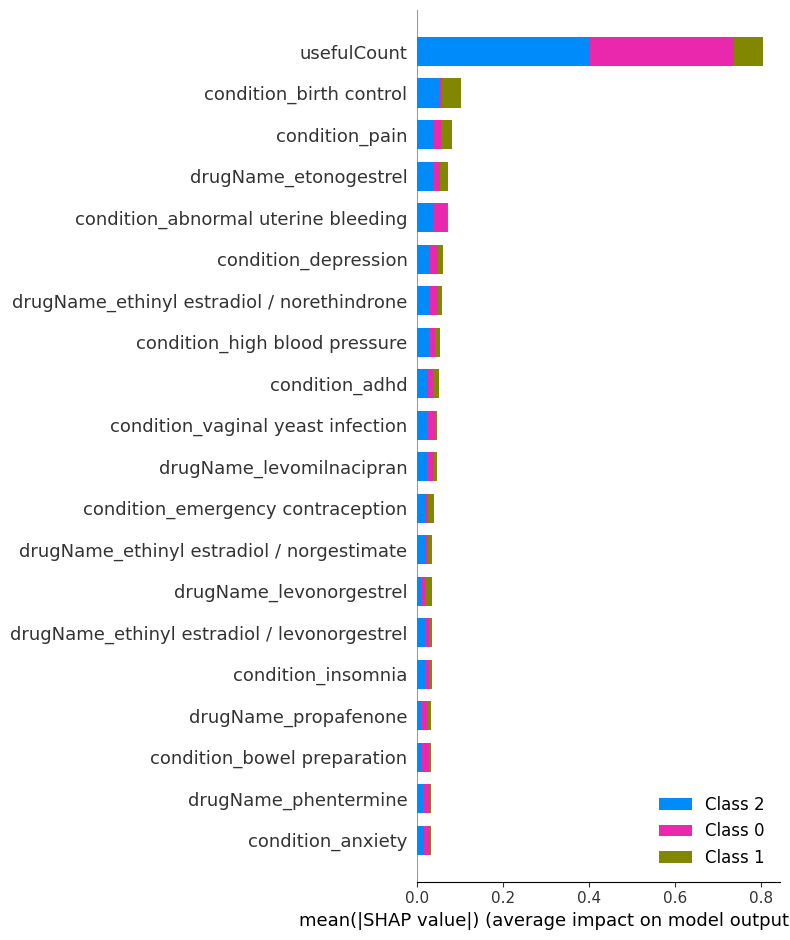

In [14]:
shap.summary_plot(
    shap_values.values,
    X_shap,
    feature_names=feature_names,
    plot_type="bar",
    max_display=20,
    show=True
)
